# Haar-cascade Detection in OpenCV



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


location of haarcascades:

```bash
$ /Users/myusername/miniconda3/envs/my_enviroment/share/OpenCV/haarcascades
```
or just download from git and place in directory:

https://github.com/opencv/opencv/tree/master/data/haarcascades

- **scaleFactor**: How much the image size is reduced at each image scale. This value is used to create the scale pyramid in order to detect faces at multiple scales in the image (some faces may be closer to the fore-ground, and thus be larger; other faces may be smaller and in the background, thus the usage of varying scales). A value of 1.05 indicates that Jeremy is reducing the size of the image by 5% at each level in the pyramid.


- __minNeighbors__: How many neighbors each window should have for the area in the window to be considered a face. The cascade classiﬁer will detect multiple windows around a face. This parameter controls how many rectangles (neighbors) needto be detected for the window to be labeled a face.


- __minSize__: A tuple of width and height (in pixels) indicating the minimum size of the window. Bounding boxes smaller than this size are ignored. It is a good idea to start with (30, 30) and ﬁne-tune from there.



```python
class FaceDetector:
    def __init__(self, faceCascadePath):
        # load the face detector
        self.faceCascade = cv2.CascadeClassifier(faceCascadePath)
        
    def detect(self, image, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30)):
        # detect faces in the image
        rects = self.faceCascade.detectMultiScale(image,
        scaleFactor = scaleFactor, minNeighbors = minNeighbors,
        minSize = minSize, flags = cv2.CASCADE_SCALE_IMAGE)

        # return the rectangles representing bounding
        # boxes around the faces
        return rects

```



In [2]:

class FaceDetector:
    def __init__(self, faceCascadePath):
        # load the face detector
        self.faceCascade = cv2.CascadeClassifier(faceCascadePath)
        
    def detect(self, image, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30)):
        # detect faces in the image
        rects = self.faceCascade.detectMultiScale(image,
                                                  scaleFactor = scaleFactor, 
                                                  minNeighbors = minNeighbors,
                                                  minSize = minSize, 
                                                  flags = cv2.CASCADE_SCALE_IMAGE)

        # return the rectangles representing bounding
        # boxes around the faces
        return rects

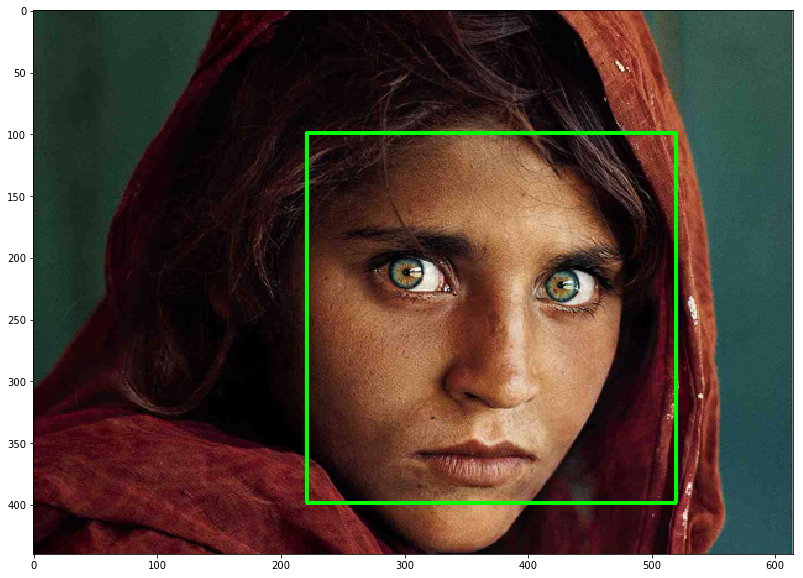

In [3]:
img = cv2.imread('images/afghan-girl.jpg')      # load image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      # convert image to RGB and save it
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # create a grayscale of the image and save it  as gray


fd = FaceDetector("haarcascades/haarcascade_frontalface_default.xml")
faceRects = fd.detect(gray, scaleFactor = 1.05, minNeighbors=10, minSize = (10,10))

for (x,y, w, h) in faceRects:
    cv2.rectangle(img, (x,y), (x+ w, y + h), (0,255,0), 2)
    
       
plt.figure(figsize=(20,10))       # change the figure size to 20 by 10
plt.imshow(img)   # display 
plt.show()                        # display image onto jupyter notebook cell

### Find Multiple faces

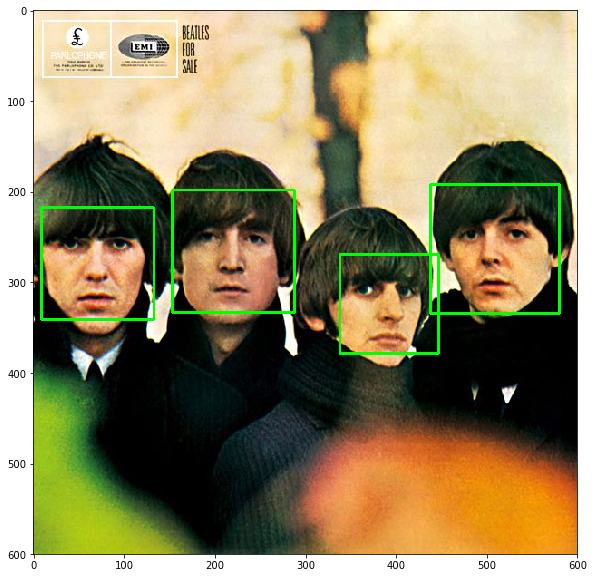

In [4]:
img = cv2.imread('images/for_sale.jpg')  # load image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # NEW VARIABLE grayscale original image 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB


fd = FaceDetector("haarcascades/haarcascade_frontalface_default.xml")
faceRects = fd.detect(gray, scaleFactor = 1.1, minNeighbors=5, minSize = (30,30))

for (x,y, w, h) in faceRects:
    cv2.rectangle(img, (x,y), (x+ w, y + h), (0,255,0), 2)
    
    
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

### Error

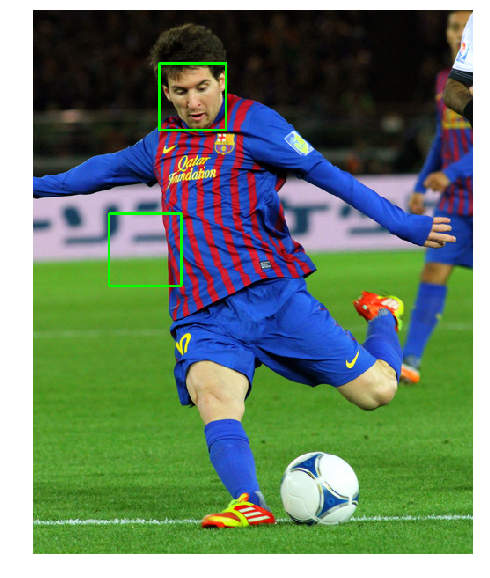

In [5]:
img = cv2.imread('images/messi2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


fd = FaceDetector("haarcascades/haarcascade_frontalface_default.xml")
faceRects = fd.detect(gray, scaleFactor = 1.1, minNeighbors=5, minSize = (30,30))

for (x,y, w, h) in faceRects:
    cv2.rectangle(img, (x,y), (x+ w, y + h), (0,255,0), 2)
    
       
plt.figure(figsize=(10,10))

plt.imshow(img),plt.axis("off")

plt.show()

---
In most cases, the offending culprit will be the scaleFactor parameter. In other cases it may be minNeighbors. But as a debugging rule, start with the scaleFactor, adjust it as needed, and then move on to minNeighbors.

**change**
```python
    faceRects = fd.detect(gray, scaleFactor = 1.2, minNeighbors=5, minSize = (30,30))
```

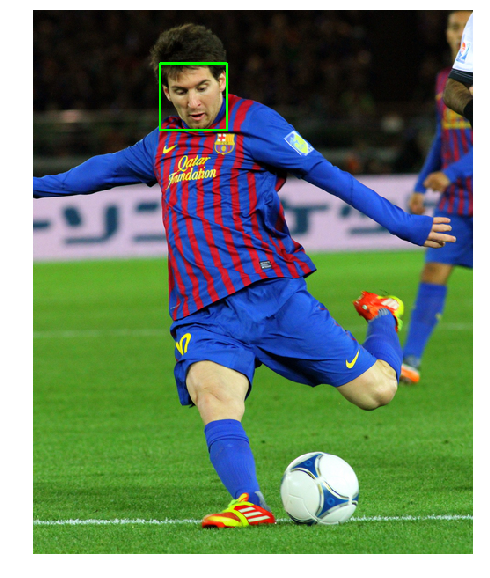

In [6]:
img = cv2.imread('images/messi2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


fd = FaceDetector("haarcascades/haarcascade_frontalface_default.xml")
faceRects = fd.detect(gray, scaleFactor = 1.2, minNeighbors=5, minSize = (30,30))

for (x,y, w, h) in faceRects:
    cv2.rectangle(img, (x,y), (x+ w, y + h), (0,255,0), 2)
    
       
plt.figure(figsize=(10,10))

plt.imshow(img),plt.axis("off")

plt.show()

### Multiple faces

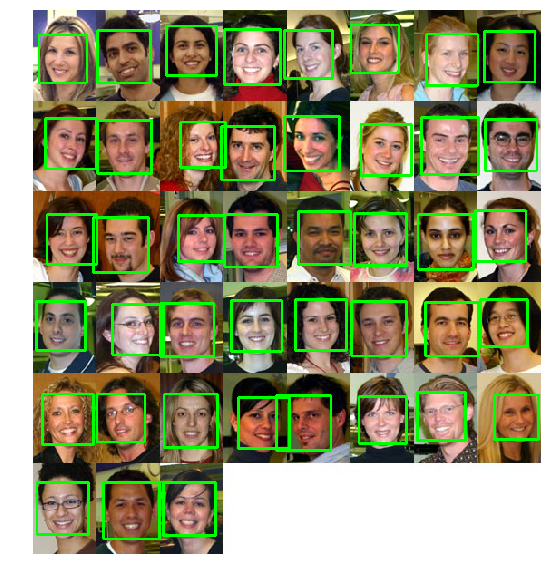

In [7]:
img = cv2.imread('images/mfaces.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


fd = FaceDetector("haarcascades/haarcascade_frontalface_default.xml")
faceRects = fd.detect(gray, scaleFactor = 1.1, minNeighbors=5, minSize = (30,30))

for (x,y, w, h) in faceRects:
    cv2.rectangle(img, (x,y), (x+ w, y + h), (0,255,0), 2)
    
       
plt.figure(figsize=(10,10))

plt.imshow(img),plt.axis("off")

plt.show()